<div align="center">

# 💻 Laptop Price Prediction  


</div>

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [247]:
df = pd.read_csv('laptop_dataset_final.csv', low_memory = False)
df.head()

,Brand,Model,Series,Thickness,Dimensions (WxDxH),Weight,Colors,Operating System,Operating System Type,Display Size,Display Resolution,Pixel Density,Display Type,Display Features,Display Touchscreen,Processor,Clock-speed,Chipset,Cache,Graphic Processor,Capacity,RAM Type,RAM Speed,Memory Slots,Memory Layout,SSD Capacity,SSD Type,Battery Cell,Battery Type,Power Supply,Wireless LAN,Wi-Fi Version,Bluetooth,Bluetooth Version,Other Networking Options,HDMI Ports,USB 2.0 slots,SD Card Reader,Ethernet ports,Headphone Jack,Microphone Jack,Web-cam,Video Recording,Audio Solution,Speakers,Sound Technologies,In-built Microphone,Microphone Type,Pointing device,Keyboard,Fingerprint scanner,Face Recognition,Warranty,Sales Package,Refresh Rate,Brightness,Graphics Memory,Expandable Memory,Thunderbolt Port,VGA Port,Backlit Keyboard,HDD Capacity,HDD Speed(RPM),HDD Type,USB 3.0 slots,Secondary cam(Rear-facing),Lockport,Battery Life,USB Type C,Battery Capacity,Aspect Ratio,Number of Cores,SSD Interface,Fast Charging Support,market_status,Price (Rs)
0,HP,14-dv0055TU (2N1L1PA),Pavilion,17 Millimeter thickness,325 x 216 x 17 mm,1.41 Kg weight (Light-weight),Tranquil Pink,Windows 10 Home Basic,64-bit,14 Inches (35.56 cm),1920 x 1080 Pixels,157 ppi,LED,Full HD LED Backlit Anti-glare IPS Micro-edge ...,No,Intel Core i5-1135G7 (11th Gen),4.2 Ghz,Intel SoC,8 MB,Intel Iris X,16 GB,DDR4,3200 Mhz,2,2x8 Gigabyte,512 GB,M.2/Optane,3 Cell,Li-Ion,43 W AC Adapter W,802.11 b/g/n/ax,6.0,Yes,5.0,Multi-Format SD media card reader,1,2.0,Yes,1.0,Yes,Yes,Yes,720p HD,HP Audio Boost,Dual Speakers,Bang & Olufsen,Yes,Dual Array Digital Microphone,Touchpad with Multi-touch Gesture Support,Standard Notebook Keyboard,No,NaN,1 Year,"Laptop, Battery, AC Adapter, User Guide",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,71990.0
1,Acer,PHN16-71 (NH.QLTSI.002),Predator Helios Neo 16,26.5 Millimeter thickness,361 x 279 x 26.5 mm,2.6 Kg weight,Black,Windows 11 Home Basic,NaN,16 Inches (40.64 cm),1920 x 1200 Pixels,142 ppi,NaN,Display with IPS (In-Plane Switching) Technolo...,No,Intel Core i7-13700HX (13th Gen),NaN,NaN,NaN,NVIDIA GeForce RTX 4050,16 GB,DDR5,NaN,1,1*16 Gigabyte,512 GB,NaN,4 Cell,Li-Ion,230 W,802.11 a/b/g/n/ac,5.0,Yes,5.1,NaN,1,NaN,Yes,1.0,Yes,Yes,Yes,720p,NaN,Stereo Speakers,NaN,Yes,Built-In Microphones,"Multi-Gesture Touchpad, Supporting Two-Finger ...",103-/104-/107-Key FineTip RGB- Keyboard With I...,NaN,NaN,NaN,"Laptop, Power Adaptor, User Guide, Warranty Do...",165 Hz,400 nits,6 GB,32 GB,4.0,No,"Yes, 103-/104-/107-Key FineTip RGB-Backlit Key...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,105999.0
2,Dell,15 5570 (A560126WIN9),Inspiron 15,22.7 Millimeter thickness,380 x 258 x 22.7 mm,2.2 Kg weight,Platinum Silver,Windows 10 Home Basic,64-bit,15.6 Inches (39.62 cm),1920 x 1080 Pixels,141 ppi,LED,Full HD LED Backlit Anti-glare Display,No,Intel Core i5-8250U (8th Gen),1.6 Ghz,NaN,6 MB,AMD Radeon 530,8 GB,DDR4,2400 Mhz,1,1 x 8 Gigabyte,NaN,NaN,3 Cell,Li-Ion,42 W AC Adapter W,802.11 a/b/g/n/ac,5.0,Yes,4.1,Multi-Format SD Media Card Reader,1,1.0,Yes,1.0,Yes,Yes,Yes,HD 720p,NaN,Stereo Speakers,Waves MaxxAudio Pro,Yes,Dual Array Digital Microphone,Touchpad with Multi-touch Gesture Support,Standard Notebook Keyboard,No,NaN,1 Year,"Laptop, Battery, AC Adapter, User Guide",NaN,NaN,2 GB,32 GB,NaN,Yes,NaN,2 TB,5400 RPM,SATA,2.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,54999.0
3,MSI,GV62 7RD-2297XIN,NaN,29 Millimeter thickness,383 x 260 x 29 mm,2.2 Kg weight,Black,DOS,64-bit,15.6 Inches (39.62 cm),1920 x 1080 Pixels,141 ppi,LED,Full HD LED Backlit Wideview Anti-glare Display,No,Intel Core i7-7700HQ (7th Gen),2.8 Ghz,NaN,6 MB,NVIDIA GeForce GTX 1050,8 GB,DDR4,2400 Mhz,1,1x8 Gigabyte,NaN,NaN,6 Cell,Li-Ion,NaN,802.11 a/b/g/n/ac,5.0,Yes,4.2,Multi-Format SD Media card Reader,1,1.0,Yes,1.0,Yes,Yes,Yes,720p HD,NaN,Quad Speakers,Nahimic 2 Audio Technology Delivering 360 Degr...,Yes,Digital Microphone,Touchpad with Multi-Touch

#### Removing null rows of Target variable Price

In [249]:
df = df.dropna(subset = ['Price (Rs)'])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8177 entries, 0 to 8197
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       8177 non-null   object 
 1   Model                       8177 non-null   object 
 2   Series                      7087 non-null   object 
 3   Thickness                   7499 non-null   object 
 4   Dimensions (WxDxH)          7497 non-null   object 
 5   Weight                      7871 non-null   object 
 6   Colors                      8001 non-null   object 
 7   Operating System            8177 non-null   object 
 8   Operating System Type       4672 non-null   object 
 9   Display Size                8174 non-null   object 
 10  Display Resolution          8145 non-null   object 
 11  Pixel Density               8143 non-null   object 
 12  Display Type                4301 non-null   object 
 13  Display Features            8046 non-n

,Wi-Fi Version,Bluetooth Version,USB 2.0 slots,Ethernet ports,USB 3.0 slots,USB Type C,Number of Cores,Price (Rs)
count,8103.000000,7362.000000,3224.000000,3435.000000,2221.000000,5171.000000,2918.000000,8177.000000
mean,5.454276,4.858897,1.328164,1.000582,1.692481,1.214659,8.910898,80852.045738
std,0.630110,0.475245,0.494086,0.024126,0.714384,0.448451,4.548102,59390.288254
min,4.000000,2.100000,1.000000,1.000000,1.000000,1.000000,2.000000,8990.000000
25%,5.000000,4.200000,1.000000,1.000000,1.000000,1.000000,6.000000,42490.000000
50%,5.000000,5.000000,1.000000,1.000000,2.000000,1.000000,8.000000,64989.000000
75%,6.000000,5.200000,2.000000,1.000000,2.000000,1.000000,12.000000,96990.000000
max,7.000000,6.000000,3.000000,2.000000,6.000000,4.000000,24.000000,499990.000000


#### Dropped columns of null value > 50%

In [251]:
missing_percent = (df.isnull().sum()/df.shape[0])*100
cols_to_drop = missing_percent[missing_percent > 50].index
print(cols_to_drop)
df = df.drop(columns = cols_to_drop)

Index(['Chipset', 'SSD Type', 'Other Networking Options', 'USB 2.0 slots',
       'Ethernet ports', 'Audio Solution', 'Sound Technologies',
       'Face Recognition', 'Refresh Rate', 'Brightness', 'Graphics Memory',
       'Expandable Memory', 'Thunderbolt Port', 'VGA Port', 'HDD Capacity',
       'HDD Speed(RPM)', 'HDD Type', 'USB 3.0 slots',
       'Secondary cam(Rear-facing)', 'Lockport', 'Battery Life',
       'Battery Capacity', 'Aspect Ratio', 'Number of Cores', 'SSD Interface',
       'Fast Charging Support'],
      dtype='object')


##  Data Cleaning & Preprocessing and Feature engeneering 

### **Feature Engineering Steps**

---

### **Renaming Columns**

---

#### **Extracting Numerical Values**  
Converted string-based columns to numeric:  
- **Thickness**  
- **Weight**  
- **Pixel Density**  
- **Clock Speed**  
- **Cache**  
- **RAM Speed**  
- **SSD**  
- **Battery**  
- **Warranty**  
- **RAM Capacity**  
- **Battery Cell**  
- **Display Size**

---

#### **Dropping Redundant Columns**  
Removed original string columns after converting to numeric.

---

#### **Feature Extraction**  
- Extracted **Resolution Width (in px)** and **Resolution Height (in px)** from `Display Resolution`.

---

### **Processor-Based Features**

---

#### **CPU Brand Categorization**  
Classified into:  
- `Intel`  
- `AMD`  
- `Apple`  
- `Qualcomm`  
- `MediaTek`  
- `Other`

---

#### **Series Level Extraction**  
Extracted series level such as:  
- `Core i3/i5/i7/i9`  
- `Ryzen 3/5/7/9`  
- `Celeron`, `Pentium`, `Athlon`  
- `Apple M1/M2/M3`

---

#### **Generation Extraction**  
Parsed generation from model names (e.g., `i5-1135G7` → 11th Gen, `Ryzen 5 5600H` → 5th Gen).

---

#### **Performance Tier Assignment**  
Labeled processor tiers as:  
- `Flagship`  
- `High`  
- `Mid`  
- `Entry`  
- `Low`  
- `Other`

---

### **Memory Slots Feature**

---

- Extracted:  
  - **Memory Slot Count**  
  - **Memory Slot Type**  
  from values like `"2 DIMM"`, `"1 SODIMM"`  
- Dropped original `Memory Slots` column.

---

### **Keyboard Type Categorization**

---

Categorized into:  
- `Gaming Keyboard`  
- `Chiclet Keyboard`  
- `Magic Keyboard`  
- `FineTip Keyboard`  
- `Standard Keyboard`  
- `Full-Size Keyboard`  
- `Single/Detachable Keyboard`  
- `Language-Specific Keyboard`  
- `Backlit Keyboard`  
- `Other Keyboard`  
- `Unknown` (replaced with mode if needed)

---

### **GPU Categorization**

---

Mapped `Graphic Processor` into categories:  
- `Gaming GPU`  
- `Entry-Level GPU`  
- `Mid-Range GPU`  
- `Integrated GPU`  
- `Workstation GPU`  
- `Mobile Integrated GPU`  
- `Other`  
- Dropped original `Graphic Processor` column.

---

### **Pointing Device Categorization**

---

Categorized pointing devices as:  
- `Touchpad`  
- `ClickPad`  
- `TrackPoint`  
- `No Device`  
- `Other`  
- `Unknown` (replaced with mode)  
- Dropped original `Pointing device` column.

---

### **Video Quality Feature**

---

- Filled missing values in `Video Recording` with mode.  
- Categorized video quality as:  
  - `Quad HD 1440p`  
  - `Full HD 1080p`  
  - `HD 720p`  
  - `SD 480p`  
  - `Unknown`  
- Dropped original `Video Recording` column.

---

### **Display Type Inference**

---

- Inferred `Display Type` from `Display Features` using keyword mapping:  
  - `IPS`, `OLED`, `TN`, `VA`, `WVA`  
- Filled remaining missing values with `'Unknown'`.

---
rred `Display Type` from `Display Features` using keyword mapping:  
  - `IPS`, `OLED`, `TN`, `VA`, `WVA`
- Missing values filled as `'Unknown'`
  
from `Display Resolution`.
t

In [254]:
def clean_and_rename_columns():
    df.rename(columns={'Price (Rs)': 'Price'}, inplace=True)

    # Helper function to extract numeric value from a string
    def extract_number(text):
        try:
            return float(''.join(c for c in str(text) if (c.isdigit() or c == '.')))
        except:
            return None

    # Thickness
    df['Thickness (in mm)'] = df['Thickness'].apply(extract_number)

    # Weight
    df['Weight (in Kg)'] = df['Weight'].apply(extract_number)

    # Pixel Density
    df['Pixel Density (in ppi)'] = df['Pixel Density'].apply(extract_number)

    # Display Resolution
    res = df['Display Resolution'].str.lower().str.replace('pixels', '').str.strip().str.split('x')
    df['Resolution Width (in px)'] = res.str[0].apply(extract_number)
    df['Resolution Height (in px)'] = res.str[1].apply(extract_number)

    # Clock Speed
    df['Clock Speed (in GHz)'] = df['Clock-speed'].apply(extract_number)

    # Cache
    df['Cache (in MB)'] = df['Cache'].apply(extract_number)

    # RAM Speed
    df['RAM Speed (in MHz)'] = df['RAM Speed'].apply(extract_number)

    # Memory Layout
    layout = (
        df['Memory Layout']
        .str.lower()
        .str.replace('gigabyte', '')
        .str.replace(' ', '')
        .str.replace('*', 'x')
        .str.split('x')
    )
    df['Total RAM (in GB)'] = layout.str[0].apply(extract_number) * layout.str[1].apply(extract_number)

    # SSD Capacity
    df['SSD Capacity (in GB)'] = df['SSD Capacity'].apply(extract_number)

    # Battery Cell
    df['Battery Cell (count)'] = df['Battery Cell'].apply(extract_number)

    df['Display Size(in inches)'] = df['Display Size'].str.split(' ').str[0]

    
    # Warranty
    df['Warranty (in Year)'] = df['Warranty'].apply(extract_number)

    # RAM Capacity
    df['RAM Capacity (in GB)'] = df['Capacity'].apply(extract_number)

    # Drop original columns
    df.drop(columns=[
        'Thickness', 'Weight', 'Pixel Density', 'Display Resolution',
        'Clock-speed', 'Cache', 'RAM Speed', 'Memory Layout',
        'SSD Capacity', 'Battery Cell', 'Warranty', 'Capacity','Display Size'
    ], inplace=True)
clean_and_rename_columns()
df['Display Size(in inches)'] = df['Display Size(in inches)'].astype(float)

In [255]:
def categorize_processors(df):
    def extract_cpu_brand(proc):
        proc = proc.lower()
        if "intel" in proc:
            return "Intel"
        elif "ryzen" in proc or "amd" in proc:
            return "AMD"
        elif "apple" in proc or "m1" in proc or "m2" in proc or "m3" in proc:
            return "Apple"
        elif "snapdragon" in proc or "qualcomm" in proc:
            return "Qualcomm"
        elif "mediatek" in proc:
            return "MediaTek"
        else:
            return "Other"

    def extract_series_level(proc):
        proc = proc.lower()
        if "core i3" in proc:
            return "Core i3"
        elif "core i5" in proc:
            return "Core i5"
        elif "core i7" in proc:
            return "Core i7"
        elif "core i9" in proc:
            return "Core i9"
        elif "celeron" in proc:
            return "Celeron"
        elif "pentium" in proc:
            return "Pentium"
        elif "ryzen 3" in proc:
            return "Ryzen 3"
        elif "ryzen 5" in proc:
            return "Ryzen 5"
        elif "ryzen 7" in proc:
            return "Ryzen 7"
        elif "ryzen 9" in proc:
            return "Ryzen 9"
        elif "athlon" in proc:
            return "Athlon"
        elif "m1" in proc:
            return "Apple M1"
        elif "m2" in proc:
            return "Apple M2"
        elif "m3" in proc:
            return "Apple M3"
        elif "snapdragon" in proc:
            return "Snapdragon"
        elif "mediatek" in proc:
            return "MediaTek"
        else:
            return "Other"

    def extract_generation(proc):
        proc = proc.lower()
        
        # Intel generation (e.g., i5-1135G7 → 11th gen)
        if "core i" in proc:
            tokens = proc.replace('-', ' ').split()
            for i, token in enumerate(tokens):
                if token in ["i3", "i5", "i7", "i9"]:
                    if i + 1 < len(tokens):
                        num = ''.join(filter(str.isdigit, tokens[i + 1]))
                        if len(num) >= 2:
                            return int(num[:2])

        # AMD generation (e.g., Ryzen 5 5600H → 5th gen)
        if "ryzen" in proc:
            tokens = proc.split()
            for i, token in enumerate(tokens):
                if token.startswith("ryzen") and i + 2 < len(tokens):
                    num = ''.join(filter(str.isdigit, tokens[i + 2]))
                    if len(num) >= 1:
                        return int(num[0])

        # Apple chips
        if "m1" in proc:
            return 1
        elif "m2" in proc:
            return 2
        elif "m3" in proc:
            return 3

        return None

    def assign_performance_tier(row):
        series = row["Series_Level"]
        gen = row["Generation"]
        brand = row["CPU_Brand"]

        if brand == "Apple":
            return "High"
        elif series in ["Core i9", "Ryzen 9"]:
            return "Flagship"
        elif series in ["Core i7", "Ryzen 7"]:
            return "High"
        elif series in ["Core i5", "Ryzen 5"]:
            return "Mid"
        elif series in ["Core i3", "Ryzen 3", "Athlon"]:
            return "Entry"
        elif series in ["Celeron", "Pentium"]:
            return "Low"
        else:
            return "Other"

    # Apply the functions
    df["CPU_Brand"] = df["Processor"].apply(extract_cpu_brand)
    df["Series_Level"] = df["Processor"].apply(extract_series_level)
    df["Generation"] = df["Processor"].apply(extract_generation)
    df["Performance_Tier"] = df.apply(assign_performance_tier, axis=1)

    return df

# Apply to your DataFrame
df = categorize_processors(df)


In [256]:
# Step 1: Fill missing Generation using group-based median
df["Generation"] = df.groupby(
    ["Series_Level", "CPU_Brand", "Performance_Tier"]
)["Generation"].transform(lambda x: x.fillna(x.median()))

# Step 2: If still any nulls left, fill with overall median (optional fallback)
df['Generation'] = df["Generation"].fillna(df["Generation"].median())

# Step 3: Drop the original Processor column
df = df.drop(columns=["Processor"])

In [257]:
def extract_slot_info(value):
    value = str(value).strip().upper()

    # Case 1: If the value is just a number (int/float-like), treat it as count and SODIMM type
    try:
        count = int(float(value))
        slot_type = 'SODIMM'
    except:
        # Case 2: If the value contains both count and type like '2 DIMM', '1 SODIMM', etc.
        parts = value.split()
        if len(parts) == 2 and parts[0].isdigit():
            count = int(parts[0])
            slot_type = parts[1]
        else:
            count = None
            slot_type = value  # fallback for messy entries
    return pd.Series([count, slot_type])

# Apply the function to split into two columns
df[['Memory Slot Count', 'Memory Slot Type']] = df['Memory Slots'].apply(extract_slot_info)

# Drop the original column
df = df.drop(columns=['Memory Slots'])

In [258]:
# First, calculate median
median_slot_count = df['Memory Slot Count'].median()

# Then fill nulls using that median
df['Memory Slot Count'] = df['Memory Slot Count'].fillna(median_slot_count)

# Now fill Memory Slot Type using mode
mode_slot_type = df['Memory Slot Type'].mode()[0]
df['Memory Slot Type'] = df['Memory Slot Type'].fillna(mode_slot_type)

In [259]:
def categorize_keyboard_type(value):
    if pd.isnull(value):
        return 'Unknown'

    val = value.lower()

    if 'gaming' in val or 'steelseries' in val or 'rgb' in val:
        return 'Gaming Keyboard'
    elif 'chiclet' in val or 'chicklet' in val or 'island-style' in val:
        return 'Chiclet Keyboard'
    elif 'magic keyboard' in val:
        return 'Magic Keyboard'
    elif 'fingertip' in val or 'fintip' in val:
        return 'FineTip Keyboard'
    elif 'standard' in val or 'notebook' in val:
        return 'Standard Keyboard'
    elif 'full-size' in val or 'full-sized' in val:
        return 'Full-Size Keyboard'
    elif 'single' in val or 'detachable' in val:
        return 'Single/Detachable Keyboard'
    elif 'english' in val or 'non' in val or 'international' in val or 'language support' in val:
        return 'Language-Specific Keyboard'
    elif 'illuminated' in val or 'backlight' in val:
        return 'Backlit Keyboard'
    else:
        return 'Other Keyboard'

In [260]:
# Categorize keyboard column
df['Keyboard_Category'] = df['Keyboard'].apply(categorize_keyboard_type)

# Fill missing values with the mode of the same column in df1
df['Keyboard_Category'] = df['Keyboard_Category'].fillna(df['Keyboard_Category'].mode()[0])
df = df.drop(columns = 'Keyboard')

In [261]:
def categorize_gpu(gpu_name):
    if pd.isnull(gpu_name):
        return 'Unknown'  # or you can use np.nan if you prefer to keep it null
    name = gpu_name.lower()
    
    if 'rtx' in name or 'gtx' in name:
        return 'Gaming GPU'
    elif 'rx' in name or ('radeon' in name and 'vega' not in name):
        return 'Entry-Level GPU'
    elif 'mx' in name or 'gt' in name or 'nvs' in name:
        return 'Mid-Range GPU'
    elif ('iris' in name or 'uhd' in name or 'hd' in name or 
          'integrated' in name or 'vega' in name or 'graphics' in name):
        return 'Integrated GPU'
    elif 'quadro' in name or 'pro' in name or ('a' in name and 'rtx' in name):
        return 'Workstation GPU'
    elif ('apple' in name or 'qualcomm' in name or 
          'mediatek' in name or 'mali' in name):
        return 'Mobile Integrated GPU'
    else:
        return 'Other'

# Apply to the dataframe
df['GPU Category'] = df['Graphic Processor'].apply(categorize_gpu)
df = df.drop(columns = 'Graphic Processor')

In [262]:
def categorize_pointing_device(device):
    if pd.isnull(device):
        return "Unknown"
    elif "Touchpad" in device or "Multi-touch" in device:
        return "Touchpad"
    elif "TrackPoint" in device:
        return "TrackPoint"
    elif "ClickPad" in device:
        return "ClickPad"
    elif "No" in device or "None" in device:
        return "No Device"
    else:
        return "Other"

# Step 2: Create the new column
df["Pointing_Device_Category"] = df["Pointing device"].apply(categorize_pointing_device)

# Step 3: Replace 'Unknown' with mode (optional)
mode_value = df["Pointing_Device_Category"].mode()[0]
df["Pointing_Device_Category"] = df["Pointing_Device_Category"].replace("Unknown", mode_value)

# Step 4: Drop the original column if needed
df = df.drop(columns=["Pointing device"])

In [263]:
df['Video Recording'].value_counts()

Video Recording
720p HD                                  3081
720p                                     1762
720                                       871
1080p                                     569
HD 720p                                   310
1080p FHD                                 209
1080p HD                                  111
1080                                       45
720P HD                                    11
1080p FaceTime HD                           9
1440p                                       9
1440p QHD                                   7
1080P FHD                                   5
720p HD RGB Camera                          4
1080p FaceTime HD Camera                    3
1                                           2
1080p FHD RGB                               2
30fps@720p                                  2
720p HD RGB                                 2
1440p HD                                    1
24 fps                                      1
720p HD RGB camera

In [264]:
# Step 1: Fill nulls in 'Video Recording' with the mode value
df['Video Recording'] = df['Video Recording'].fillna(df['Video Recording'].mode()[0])


# Step 2: Define the categorization function (without filling here)
def categorize_video_quality(value):
    if isinstance(value, str):
        val = value.lower()
        if '1440' in val or 'qhd' in val or 'quad hd' in val:
            return 'Quad HD 1440p'
        elif '1080' in val or 'fhd' in val:
            return 'Full HD 1080p'
        elif '720' in val or 'hd' in val:
            return 'HD 720p'
        elif '480' in val:
            return 'SD 480p'
    return 'Unknown'

# Step 3: Apply the function
df['Video Quality'] = df['Video Recording'].apply(categorize_video_quality)

# Step 4: Drop original column if needed
df.drop(columns='Video Recording', inplace=True)

In [265]:
df['Video Quality'].value_counts()

Video Quality
HD 720p          7198
Full HD 1080p     957
Quad HD 1440p      18
Unknown             3
SD 480p             1
Name: count, dtype: int64

In [266]:
def infer_display_type(row):
    if pd.notnull(row['Display Type']):
        return row['Display Type']  # Keep original if not null

    display_features = str(row['Display Features']).lower()
    if 'ips' in display_features:
        return 'IPS'
    elif 'oled' in display_features:
        return 'OLED'
    elif 'tn' in display_features:
        return 'TN'
    elif 'va' in display_features:
        return 'VA'
    elif 'wva' in display_features:
        return 'WVA'
    else:
        return None  # Could not infer

# Apply the function row-wise to fill Display Type where null
df['Display Type'] = df.apply(infer_display_type, axis=1)
df['Display Type'] = df['Display Type'].fillna('Unknown')

In [267]:
df['Display Touchscreen'].value_counts()

Display Touchscreen
No     7177
Yes     918
Name: count, dtype: int64

In [268]:
def infer_touchscreen(row):
    if pd.isnull(row['Display Touchscreen']):
        text = str(row['Display Features']).lower()
        if 'touch' in text or '2-in-1' in text or 'convertible' in text:
            return 'Yes'
        else:
            return 'No'
    else:
        return row['Display Touchscreen']

df['Display Touchscreen'] = df.apply(infer_touchscreen, axis=1)

In [269]:
pd.set_option('display.max_columns',None)

## Dropped Unnecessary Columns
 #### Due to Low Variance
  - SD Card Reader,Headphone Jack,Microphone Jack,Web-cam,Operating System,Resolution Width (in px),Resolution Height (in px),Display Size,
    In-built Microphone
- Dropped Total RAM (In GB) since it has multicolinearity with RAM Capacity (in GB)
- Dropped Backlit Keyboard due to very low correlation with Price

In [271]:
df[['RAM Capacity (in GB)', 'Total RAM (in GB)']].corr()

,RAM Capacity (in GB),Total RAM (in GB)
RAM Capacity (in GB),1.000000,0.981748
Total RAM (in GB),0.981748,1.000000


In [272]:
df['Backlit Keyboard'].nunique()

636

In [273]:
def detect_backlit(keyboard_str):
    s = str(keyboard_str).lower()
    if 'backlit' in s and 'non-backlit' not in s:
        return 1
    else:
        return 0

# Apply only to non-null rows
df.loc[df['Backlit Keyboard'].notna(), 'Has_Backlit_Keyboard'] = df.loc[df['Backlit Keyboard'].notna(), 'Backlit Keyboard'].apply(detect_backlit)


,Has_Backlit_Keyboard,Price
Has_Backlit_Keyboard,1.000000,0.130556
Price,0.130556,1.000000


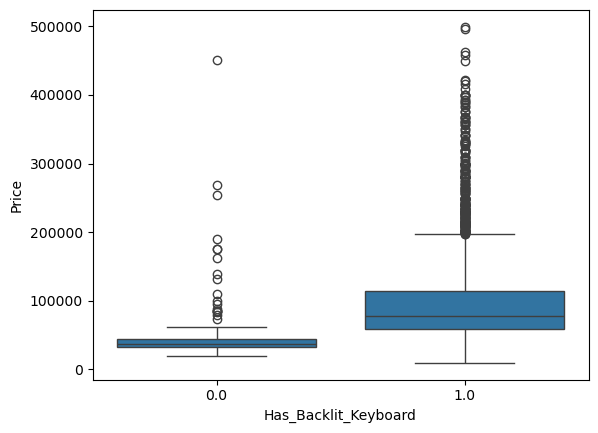

In [274]:
sns.boxplot(x='Has_Backlit_Keyboard', y='Price', data=df)
df[['Has_Backlit_Keyboard','Price']].corr()

In [275]:
df['Operating System Type'].value_counts()

Operating System Type
64-bit    4667
32-bit       5
Name: count, dtype: int64

In [276]:
df['Wireless LAN'].value_counts()

Wireless LAN
802.11 b/g/n/ax      3925
802.11 a/b/g/n/ac    3574
802.11 b/g/n          424
802.11 b/g/n/be       120
802.11 a/b/g/n         53
802.11 a/g/n            7
Name: count, dtype: int64

In [277]:
df['Bluetooth'].value_counts()

Bluetooth
Yes    8128
No        1
Name: count, dtype: int64

In [278]:
df['SD Card Reader'].value_counts()

SD Card Reader
Yes    4471
No        6
Name: count, dtype: int64

In [279]:
df['Headphone Jack'].value_counts()

Headphone Jack
Yes    8160
No        3
Name: count, dtype: int64

In [280]:
df['Microphone Jack'].value_counts()

Microphone Jack
Yes    8160
No        1
Name: count, dtype: int64

In [281]:
df['Web-cam'].value_counts()

Web-cam
Yes    7891
No       15
Name: count, dtype: int64

In [282]:
df['In-built Microphone'].value_counts()

In-built Microphone
Yes    7983
No        9
Name: count, dtype: int64

In [283]:
df['PPI_Calculated'] = (
    ((df['Resolution Width (in px)']**2 + df['Resolution Height (in px)']**2)**0.5)
    / df['Display Size(in inches)']
)
df[['PPI_Calculated','Pixel Density (in ppi)']].corr()

,PPI_Calculated,Pixel Density (in ppi)
PPI_Calculated,1.000000,0.999976
Pixel Density (in ppi),0.999976,1.000000


Battery Type
Li-Ion    6440
Li-Po     1007
Name: count, dtype: int64


<Axes: xlabel='Battery Type', ylabel='Price'>

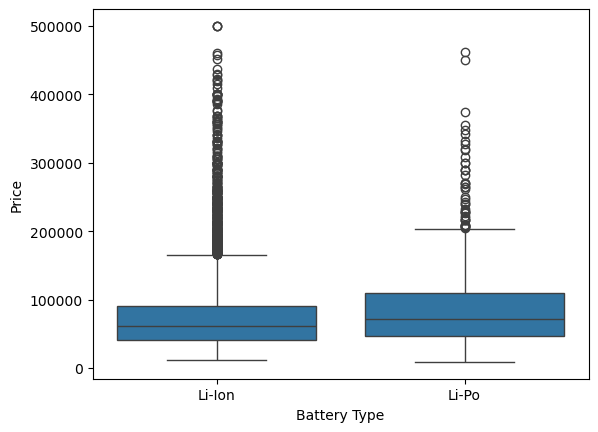

In [284]:
print(df['Battery Type'].value_counts())
sns.boxplot(x='Battery Type', y='Price', data=df)

In [285]:
def infer_battery_type_from_display(display):
    text = str(display).lower()

    # MacBook-style displays → Li-Po
    if 'retina' in text or 'liquid retina' in text:
        return 'Li-Po'

    # AMOLED or OLED screens → Li-Po (used in thin/premium devices)
    elif 'amoled' in text or 'oled' in text:
        return 'Li-Po'

    # Very thin & premium displays (Edge-to-edge, NanoEdge, True Tone)
    elif 'edge-to-edge' in text or 'nanoedge' in text or 'true tone' in text:
        return 'Li-Po'

    # Default guess (Li-Ion is more common otherwise)
    else:
        return 'Li-Ion'

# Only fill nulls in Battery Type based on Display Features
mask = df['Battery Type'].isna()
df.loc[mask, 'Battery Type'] = df.loc[mask, 'Display Features'].apply(infer_battery_type_from_display)
df['Battery Type'].value_counts()

Battery Type
Li-Ion    7112
Li-Po     1065
Name: count, dtype: int64

In [286]:
df = df.drop(columns = ['Backlit Keyboard','Operating System Type','Model','Series','Colors','Wireless LAN','Bluetooth',
                   'HDMI Ports','SD Card Reader','Headphone Jack','Microphone Jack','Web-cam','Speakers','In-built Microphone','Microphone Type',
                   'Sales Package','market_status','Power Supply','Has_Backlit_Keyboard','Total RAM (in GB)','Resolution Width (in px)',
                        'Resolution Height (in px)','Display Size(in inches)','PPI_Calculated','Dimensions (WxDxH)','Display Features'])

In [287]:
df.shape

(8177, 31)

#### filling null values and performing EDA
- using display feature column
- using median since many columns have outliers

In [289]:
df['Bluetooth Version'].value_counts()

Bluetooth Version
5.0    1900
5.1    1156
5.3    1100
5.2    1013
4.2     761
4.1     663
4.0     557
5.4     191
6.0      14
3.0       6
2.1       1
Name: count, dtype: int64

<Axes: xlabel='Bluetooth Version', ylabel='Price'>

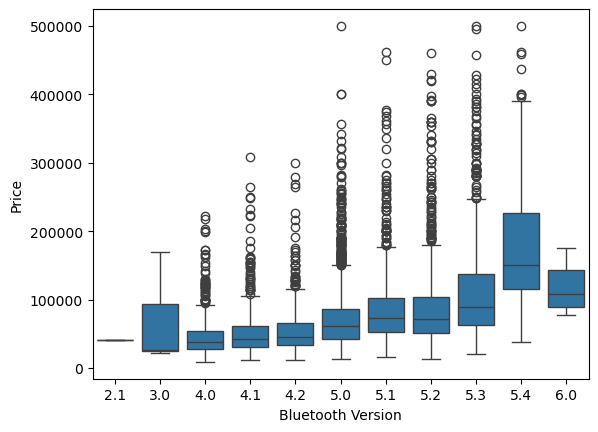

In [290]:
df[['Bluetooth Version','Price']].corr()
sns.boxplot(x = 'Bluetooth Version', y = 'Price',data = df)

In [291]:
df['Bluetooth Version'] = df.groupby(['CPU_Brand', 'Generation'])['Bluetooth Version'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))
df['Bluetooth Version'].value_counts()

Bluetooth Version
5.0    2292
5.3    1269
5.1    1179
5.2    1177
4.2     801
4.1     663
4.0     565
5.4     210
6.0      14
3.0       6
2.1       1
Name: count, dtype: int64

In [292]:
df.iloc[:,-20:-11].head()

,Thickness (in mm),Weight (in Kg),Pixel Density (in ppi),Clock Speed (in GHz),Cache (in MB),RAM Speed (in MHz),SSD Capacity (in GB),Battery Cell (count),Warranty (in Year)
0,17.0,1.41,157.0,4.2,8.0,3200.0,512.0,3.0,1.0
1,26.5,2.60,142.0,NaN,NaN,NaN,512.0,4.0,NaN
2,22.7,2.20,141.0,1.6,6.0,2400.0,NaN,3.0,1.0
3,29.0,2.20,141.0,2.8,6.0,2400.0,NaN,6.0,1.0
4,23.0,1.80,141.0,NaN,4.0,2666.0,256.0,3.0,1.0


In [293]:
df.iloc[:,-20:-11].isnull().sum()

Thickness (in mm)          678
Weight (in Kg)             306
Pixel Density (in ppi)      34
Clock Speed (in GHz)       467
Cache (in MB)             1560
RAM Speed (in MHz)        3082
SSD Capacity (in GB)      1333
Battery Cell (count)      1301
Warranty (in Year)         446
dtype: int64

count    7499.000000
mean       21.426436
std         8.757526
min         5.600000
25%        17.900000
50%        19.900000
75%        23.000000
max        80.000000
Name: Thickness (in mm), dtype: float64


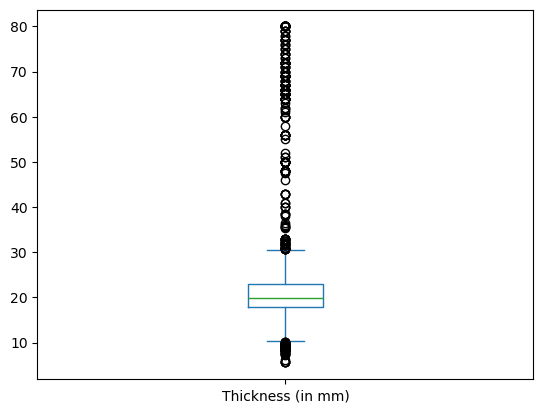

In [294]:
print(df['Thickness (in mm)'].describe())
df['Thickness (in mm)'].plot(kind = 'box')
df['Thickness (in mm)'] = df['Thickness (in mm)'].fillna(df['Thickness (in mm)'].median())

count    8143.000000
mean      153.181628
std        35.675412
min        83.000000
25%       141.000000
50%       141.000000
75%       157.000000
max       338.000000
Name: Pixel Density (in ppi), dtype: float64


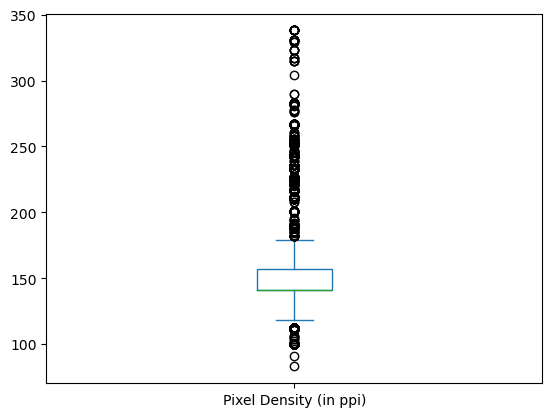

In [295]:
print(df['Pixel Density (in ppi)'].describe())
df['Pixel Density (in ppi)'].plot(kind = 'box')
df['Pixel Density (in ppi)'] = df['Pixel Density (in ppi)'].fillna(df['Pixel Density (in ppi)'].median())

count    7871.000000
mean        1.824730
std         0.447149
min         0.510000
25%         1.500000
50%         1.750000
75%         2.190000
max         5.500000
Name: Weight (in Kg), dtype: float64


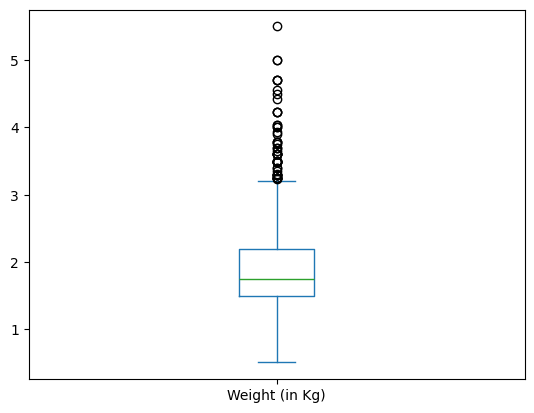

In [296]:
print(df['Weight (in Kg)'].describe())
df['Weight (in Kg)'].plot(kind = 'box')
df['Weight (in Kg)'] = df['Weight (in Kg)'].fillna(df['Weight (in Kg)'].median())

In [297]:
print(df['Clock Speed (in GHz)'].describe())
df['Clock Speed (in GHz)'] = df.groupby(['Performance_Tier', 'Generation'])['Clock Speed (in GHz)'].transform(
    lambda x: x.fillna(x.median())
)

count    7710.000000
mean        3.104021
std         1.265827
min         0.800000
25%         2.100000
50%         2.800000
75%         4.400000
max         5.800000
Name: Clock Speed (in GHz), dtype: float64


In [298]:
print(df['RAM Speed (in MHz)'].describe())
df['RAM Speed (in MHz)'] = df.groupby(['RAM Type', 'RAM Capacity (in GB)'])['RAM Speed (in MHz)'].transform(
    lambda x: x.fillna(x.median())
)
df['RAM Speed (in MHz)'] = df['RAM Speed (in MHz)'].fillna(df['RAM Speed (in MHz)'].median())

count    5095.000000
mean     3272.757998
std      1287.614261
min      1085.000000
25%      2400.000000
50%      3200.000000
75%      3200.000000
max      8533.000000
Name: RAM Speed (in MHz), dtype: float64


In [299]:
print(df['SSD Capacity (in GB)'].describe())
df['SSD Capacity (in GB)'] = df['SSD Capacity (in GB)'].fillna(df['SSD Capacity (in GB)'].median())

count    6844.000000
mean      335.456897
std       217.028520
min         1.000000
25%       128.000000
50%       512.000000
75%       512.000000
max       512.000000
Name: SSD Capacity (in GB), dtype: float64


In [300]:
print(df['Battery Cell (count)'].describe())
df['Battery Cell (count)'] = df['Battery Cell (count)'].fillna(df['Battery Cell (count)'].median())
df['Battery Cell (count)'] = df['Battery Cell (count)'].clip(upper=8)

count    6876.000000
mean        3.371873
std         0.957278
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Battery Cell (count), dtype: float64


In [301]:
print(df['Warranty (in Year)'].describe())
df['Warranty (in Year)'] = df['Warranty (in Year)'].fillna(df['Warranty (in Year)'].median())
df['Warranty (in Year)'] = df['Warranty (in Year)'].clip(upper=3)
df['Warranty (in Year)'].value_counts()

count    7731.000000
mean        1.132906
std         0.469880
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: Warranty (in Year), dtype: float64


Warranty (in Year)
1.0    7467
2.0     414
3.0     295
1.5       1
Name: count, dtype: int64

In [302]:
print(df['Cache (in MB)'].describe())
df['Cache (in MB)'] = df.groupby(['CPU_Brand', 'Series_Level', 'Generation'])['Cache (in MB)'].transform(lambda x: x.fillna(x.median()))

df['Cache (in MB)'] = df.groupby(['Performance_Tier'])['Cache (in MB)'].transform(lambda x: x.fillna(x.median()))

# Optional: Remove extreme outliers
df['Cache (in MB)'] = df['Cache (in MB)'].clip(upper=48)

count    6617.000000
mean       10.813994
std         7.562562
min         1.000000
25%         6.000000
50%         8.000000
75%        16.000000
max        83.000000
Name: Cache (in MB), dtype: float64


In [303]:
df['USB Type C'] = df['USB Type C'].fillna(df['USB Type C'].median())

In [304]:
# Create a mapping dictionary for all known values
fingerprint_mapping = {
    'Yes': 'Yes',
    'Yes, Touch ID': 'Yes',
    'Yes, Anti-fingerprint Deck': 'Yes',
    'Touch Style, Integrated In Power Button': 'Yes',
    'No': 'No',
    'No6': 'No'
}
df['Fingerprint scanner'] = df['Fingerprint scanner'].replace(fingerprint_mapping)
df['Fingerprint scanner'] = df['Fingerprint scanner'].fillna('No')
df['Fingerprint scanner'].value_counts()

Fingerprint scanner
No     6192
Yes    1985
Name: count, dtype: int64

In [305]:
print(df['Wi-Fi Version'].describe())
print(df['Wi-Fi Version'].value_counts())
df['Wi-Fi Version'] = df['Wi-Fi Version'].fillna(df['Wi-Fi Version'].mode()[0])

count    8103.000000
mean        5.454276
std         0.630110
min         4.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: Wi-Fi Version, dtype: float64
Wi-Fi Version
6.0    3925
5.0    3574
4.0     484
7.0     120
Name: count, dtype: int64


In [306]:
print(df['RAM Type'].value_counts())
def fill_ram_type(row):
    if pd.isna(row['RAM Type']):
        if row['RAM Capacity (in GB)'] <= 4:
            return 'DDR3'
        elif row['RAM Capacity (in GB)'] <= 8:
            return 'DDR4'
        else:
            return 'DDR5'
    else:
        return row['RAM Type']

df['RAM Type'] = df.apply(fill_ram_type, axis=1)

RAM Type
DDR4              5401
DDR5               983
LPDDR5             470
LPDDR4X            347
LPDDR5X            320
DDR3               272
LPDDR3             111
LPDDR4             100
Unified Memory       2
DDR2                 1
Name: count, dtype: int64


In [307]:
df[['Warranty (in Year)','Price']].corr()

,Warranty (in Year),Price
Warranty (in Year),1.000000,0.211265
Price,0.211265,1.000000


In [308]:
df = df.drop(columns = 'Warranty (in Year)')

In [309]:
df.head()

,Brand,Operating System,Display Type,Display Touchscreen,RAM Type,Battery Type,Wi-Fi Version,Bluetooth Version,Fingerprint scanner,USB Type C,Price,Thickness (in mm),Weight (in Kg),Pixel Density (in ppi),Clock Speed (in GHz),Cache (in MB),RAM Speed (in MHz),SSD Capacity (in GB),Battery Cell (count),RAM Capacity (in GB),CPU_Brand,Series_Level,Generation,Performance_Tier,Memory Slot Count,Memory Slot Type,Keyboard_Category,GPU Category,Pointing_Device_Category,Video Quality
0,HP,Windows 10 Home Basic,LED,No,DDR4,Li-Ion,6.0,5.0,No,1.0,71990.0,17.0,1.41,157.0,4.2,8.0,3200.0,512.0,3.0,16.0,Intel,Core i5,11.0,Mid,2.0,SODIMM,Standard Keyboard,Integrated GPU,Touchpad,HD 720p
1,Acer,Windows 11 Home Basic,IPS,No,DDR5,Li-Ion,5.0,5.1,No,1.0,105999.0,26.5,2.60,142.0,4.9,24.0,4800.0,512.0,4.0,16.0,Intel,Core i7,13.0,High,1.0,SODIMM,Gaming Keyboard,Gaming GPU,Touchpad,HD 720p
2,Dell,Windows 10 Home Basic,LED,No,DDR4,Li-Ion,5.0,4.1,No,1.0,54999.0,22.7,2.20,141.0,1.6,6.0,2400.0,512.0,3.0,8.0,Intel,Core i5,82.0,Mid,1.0,SODIMM,Standard Keyboard,Entry-Level GPU,Touchpad,HD 720p
3,MSI,DOS,LED,No,DDR4,Li-Ion,5.0,4.2,No,1.0,67990.0,29.0,2.20,141.0,2.8,6.0,2400.0,512.0,6.0,8.0,Intel,Core i7,77.0,High,1.0,SODIMM,Gaming Keyboard,Gaming GPU,Touchpad,HD 720p
4,Dell,Windows 11 Home Basic,Unknown,No,DDR4,Li-Ion,5.0,5.0,No,2.0,42210.0,23.0,1.80,141.0,3.0,4.0,2666.0,256.0,3.0,4.0,AMD,Athlon,11.0,Entry,1.0,SODIMM,Language-Specific Keyboard,Entry-Level GPU,Touchpad,HD 720p


In [310]:
df.isnull().sum()

Brand                       0
Operating System            0
Display Type                0
Display Touchscreen         0
RAM Type                    0
Battery Type                0
Wi-Fi Version               0
Bluetooth Version           0
Fingerprint scanner         0
USB Type C                  0
Price                       0
Thickness (in mm)           0
Weight (in Kg)              0
Pixel Density (in ppi)      0
Clock Speed (in GHz)        0
Cache (in MB)               0
RAM Speed (in MHz)          0
SSD Capacity (in GB)        0
Battery Cell (count)        0
RAM Capacity (in GB)        0
CPU_Brand                   0
Series_Level                0
Generation                  0
Performance_Tier            0
Memory Slot Count           0
Memory Slot Type            0
Keyboard_Category           0
GPU Category                0
Pointing_Device_Category    0
Video Quality               0
dtype: int64

## Label Encoding of Categorical columns

In [312]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to preserve original
df_encoded = df.copy()

# Initialize label encoder
le = LabelEncoder()

# Loop through object columns and apply label encoding
for col in df_encoded.select_dtypes(include='object').columns:
    try:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    except Exception as e:
        print(f"Label encoding failed for column: {col} due to {e}")

In [313]:
df_encoded.head()

,Brand,Operating System,Display Type,Display Touchscreen,RAM Type,Battery Type,Wi-Fi Version,Bluetooth Version,Fingerprint scanner,USB Type C,Price,Thickness (in mm),Weight (in Kg),Pixel Density (in ppi),Clock Speed (in GHz),Cache (in MB),RAM Speed (in MHz),SSD Capacity (in GB),Battery Cell (count),RAM Capacity (in GB),CPU_Brand,Series_Level,Generation,Performance_Tier,Memory Slot Count,Memory Slot Type,Keyboard_Category,GPU Category,Pointing_Device_Category,Video Quality
0,9,12,4,0,2,0,6.0,5.0,0,1.0,71990.0,17.0,1.41,157.0,4.2,8.0,3200.0,512.0,3.0,16.0,2,6,11.0,4,2.0,4,8,2,2,1
1,0,16,1,0,3,0,5.0,5.1,0,1.0,105999.0,26.5,2.60,142.0,4.9,24.0,4800.0,512.0,4.0,16.0,2,7,13.0,2,1.0,4,3,1,2,1
2,6,12,4,0,2,0,5.0,4.1,0,1.0,54999.0,22.7,2.20,141.0,1.6,6.0,2400.0,512.0,3.0,8.0,2,6,82.0,4,1.0,4,8,0,2,1
3,16,0,4,0,2,0,5.0,4.2,0,1.0,67990.0,29.0,2.20,141.0,2.8,6.0,2400.0,512.0,6.0,8.0,2,7,77.0,2,1.0,4,3,1,2,1
4,6,16,13,0,2,0,5.0,5.0,0,2.0,42210.0,23.0,1.80,141.0,3.0,4.0,2666.0,256.0,3.0,4.0,0,3,11.0,0,1.0,4,4,0,2,1


In [314]:
!pip install xgboost

### **XGBoost Regressor with Hyperparameter Tuning**

#### **Train-Test Split**
- Split the dataset into training and testing sets using an 80-20 ratio.
- Target variable: `Price`
- Features: All other columns after label encoding.

#### **Model Definition**
- Initialized **XGBRegressor** with:
  - `random_state=42` for reproducibility
  - `n_jobs=-1` to utilize all available CPU cores

#### **Hyperparameter Space**
Defined a parameter distribution for tuning:
- `n_estimators`: [100, 200, 300, 500]
- `learning_rate`: [0.01, 0.05, 0.1, 0.3]
- `max_depth`: [3, 5, 7, 10]
- `subsample`: [0.6, 0.8, 1.0]
- `colsample_bytree`: [0.6, 0.8, 1.0]
- `reg_alpha` (L1 regularization): [0, 0.1, 1]
- `reg_lambda` (L2 regularization): [1, 1.5, 2]

#### **Hyperparameter Tuning**
- Used `RandomizedSearchCV` with:
  - `n_iter=30` (30 random combinations)
  - `cv=5` (5-fold cross-validation)
  - `scoring='r2'` to optimize R² score
  - `verbose=1` to track progress
  - `n_jobs=-1` for parallel processing


#### **Model Evaluation**
- Evaluated the tuned model on the test set using:
  - **R² Score**
  - **MAE (Mean Absolute Error)**
  - **MSE (Mean Squared Error)**
  - **RMSE (Root Mean Squared Error)**

#### **Results**

- **R² Score** – 0.8890
- **RMSE** – 19948.53


In [316]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Price",axis = 1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Define model
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predict
y_pred_tuned = best_xgb.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_tuned)
mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)

print("📊 Tuned XGBoost Performance:")
print(f"R² Score       : {r2:.4f}")
print(f"MAE            : {mae:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
📊 Tuned XGBoost Performance:
R² Score       : 0.8890
MAE            : 11494.54
MSE            : 397943720.12
RMSE           : 19948.53
